<a href="https://colab.research.google.com/github/Neeraj6maths/LinearRegression_BostonHousing/blob/main/Copy_of_Assignment_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.

## Using this dataset, explain your understanding of linear regression. You should do some checks on the features and the dependent variable, get some plots and distributions for the given variables. Please make this assignment as elaborate as you can.</b>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Machine Learning/Week1/Linear Regression I/Data files/Copy of housing.csv", header = None)

In [4]:
# columns = ['CRIM', 'ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
# df = pd.read_csv('/content/drive/MyDrive/dat/housing.csv', header=None, delimiter='\s+', names=columns)

In [11]:
df[0] = df[0].str.replace(r"\s+", " ", regex = True )   # Multiple no. of spaces are present replacing them by single space
df = df[0].str.split(" ", expand = True)  # Splitting the single column by space and expanding the dataframe
df = df.drop([0], axis = 1)   #dropping first column as it contains the trailing single space

In [12]:
# renaming columns of dataframe
df.rename(columns= {1:'CRIM',2:'ZN',3:'INDUS',4:'CHAS',5:'NOX',6:'RM',7:'AGE',8:'DIS',9:'RAD',10:'TAX',11:'PTRATIO',12:'B',13:'LSTAT',14:'MEDV'}, inplace = True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
1,0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60
2,0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70
3,0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40
4,0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.00,11.930,0,0.5730,6.5930,69.10,2.4786,1,273.0,21.00,391.99,9.67,22.40
502,0.04527,0.00,11.930,0,0.5730,6.1200,76.70,2.2875,1,273.0,21.00,396.90,9.08,20.60
503,0.06076,0.00,11.930,0,0.5730,6.9760,91.00,2.1675,1,273.0,21.00,396.90,5.64,23.90
504,0.10959,0.00,11.930,0,0.5730,6.7940,89.30,2.3889,1,273.0,21.00,393.45,6.48,22.00


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CRIM     506 non-null    object
 1   ZN       506 non-null    object
 2   INDUS    506 non-null    object
 3   CHAS     506 non-null    object
 4   NOX      506 non-null    object
 5   RM       506 non-null    object
 6   AGE      506 non-null    object
 7   DIS      506 non-null    object
 8   RAD      506 non-null    object
 9   TAX      506 non-null    object
 10  PTRATIO  506 non-null    object
 11  B        506 non-null    object
 12  LSTAT    506 non-null    object
 13  MEDV     452 non-null    object
dtypes: object(14)
memory usage: 55.5+ KB


Here each column is in object type that is string type. Lets change each column to float type.

In [17]:
df = df.astype(float)

In [18]:
housing_df = df.copy(deep = True)

In [9]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Checking for duplicate columns and removing them.

In [22]:
housing_df.duplicated().sum()   # No duplicate rows

0

In [23]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Few rows are present with null values for MEDV. We will remove such rows.

In [24]:
not_null_df = housing_df[~housing_df['MEDV'].isnull()]

In [25]:
not_null_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     452 non-null    float64
 1   ZN       452 non-null    float64
 2   INDUS    452 non-null    float64
 3   CHAS     452 non-null    float64
 4   NOX      452 non-null    float64
 5   RM       452 non-null    float64
 6   AGE      452 non-null    float64
 7   DIS      452 non-null    float64
 8   RAD      452 non-null    float64
 9   TAX      452 non-null    float64
 10  PTRATIO  452 non-null    float64
 11  B        452 non-null    float64
 12  LSTAT    452 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(14)
memory usage: 53.0 KB


Checking unique values

In [42]:
not_null_df['CHAS'].unique()    # categorical column

array([0., 1.])

In [45]:
not_null_df['RAD'].unique()  # categorical column

array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.])

Checking for outliers

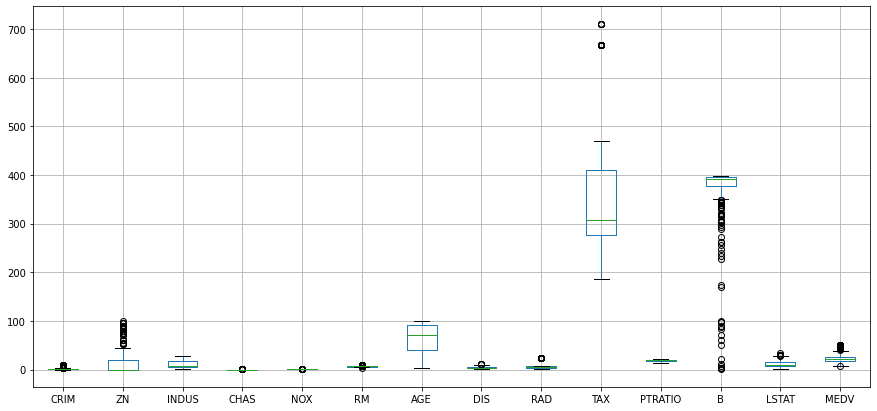

In [28]:
not_null_df.boxplot(figsize = (15,7))

We can see there are no significant outliers, tax have slighlty higher value but that is possible in real cases.So we won't remove any outliers.

Here, we are given that MEDV is the dependent variable and remaining variables are independent variable. \
 \
To apply the Linear regression on  this dataset, we have to first check the assumptions of LR algorithm. \
Assumptions of LR algorithm are as follows: \
(1) <b>The relation between the dependent and independent variables should be almost linear.</b> \
This can be checked by plotting the scatter plots of dependent variable with all independent variables, once at a time. \
 \
 (2) <b>No multicollinearity should be there. Meaning, independent variables should not be in correlation with each other.</b>\
 This can be checked by plotting the heatmap of correlation of dependent variables. \
 \
 (3) <b>Independent variables and dependent variable should follow Gausian distribution.</b> \
 This can be checked by plotting distribution plot of each variable. \
 \
 (4) <b>There should be  homoscedestacity or equal variance in a regression model. This assumption means that the variance around the regression line is almost same for all values of independent variables.</b> \
 This can be checked by plotting scatter plot of Residual epsilon (y_y^) vs Fitted value y^. \
  \
  (5) <b> Mean of residuals (epsilon) should be 0 or close to 0. That is, it should also follow Gausian distribution.</b> \
  Can be checked by finding mean of residuals and plotting distribution plot.
   \
    \
     \
     We can check only first 3 assumptions before applying regression.


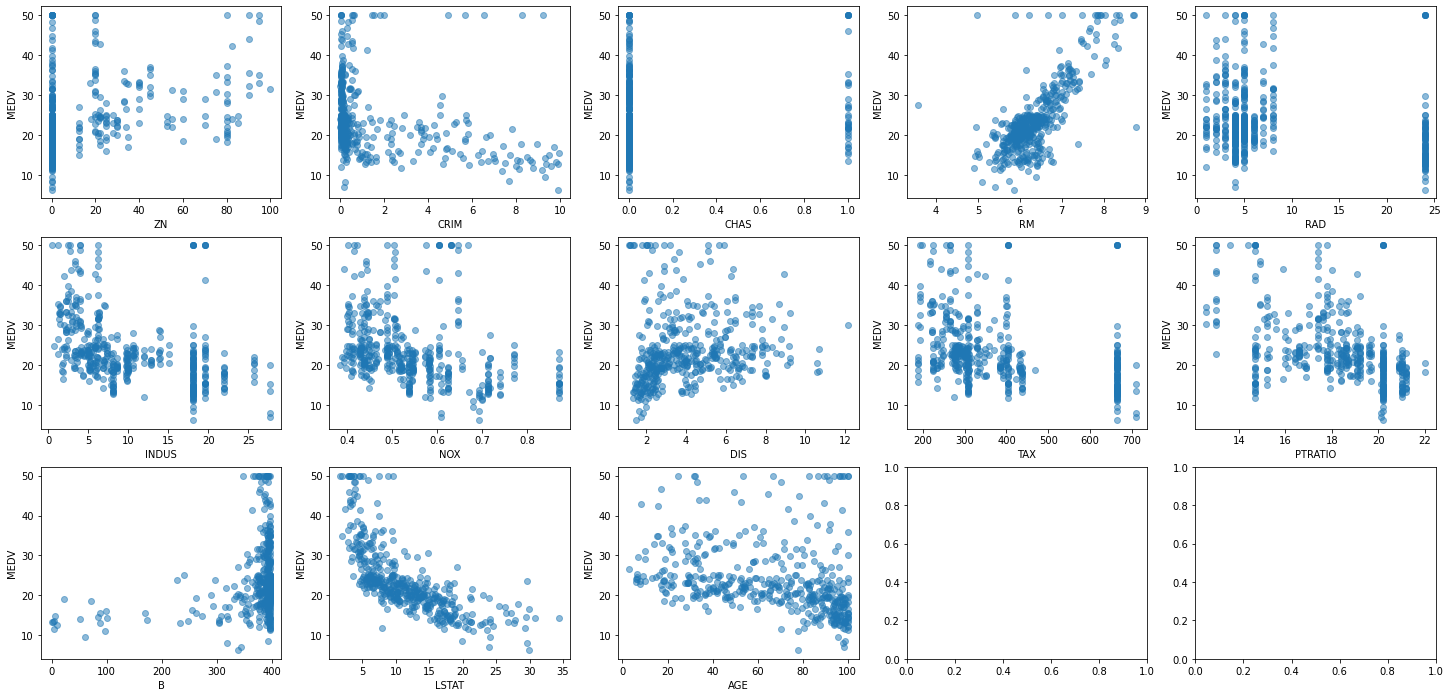

In [29]:
dep_var = 'MEDV'
ind_var = list(set(list(not_null_df.columns)) - {dep_var})

row = 3
col = 5
fig, axis = plt.subplots(row,col, figsize = (25,12))


for i in range(row):
  for j in range(col):
    axis[i,j].scatter(not_null_df[ind_var[(i*5)+j]], not_null_df[dep_var], alpha=0.5)
    axis[i,j].set_xlabel(ind_var[(i*5)+j])
    axis[i,j].set_ylabel(dep_var)
    if i*5+j == 12:
      break
  


plt.show()

We can see that MEDV has linear relation with most of the dependent variables. 

### Doubt: Should we perform lognormal or anyother transformation to make linear relation more clear.

# Multicollinearity

To check for independent variables.

In [47]:
# categorical_var = {'RAD','CHAS'}

# ind_cat_var = list(set(ind_var) - categorical_var)

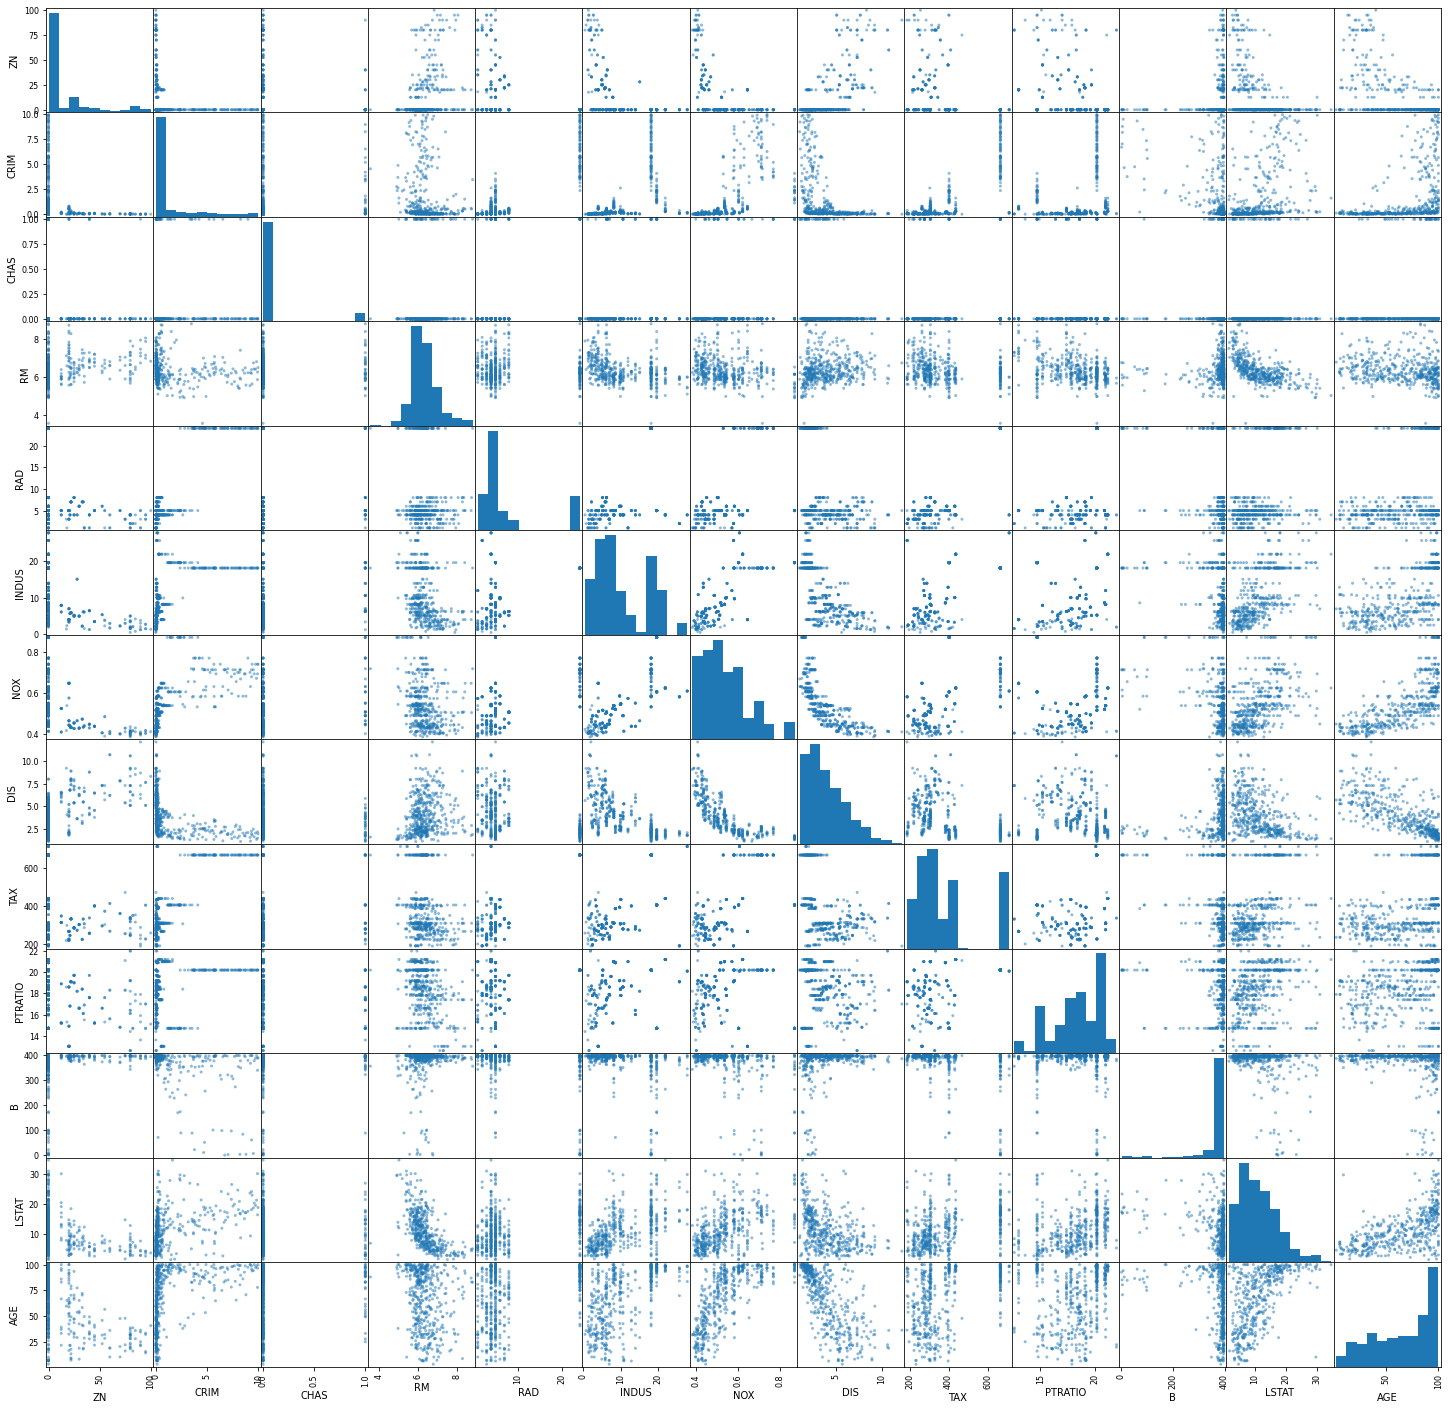

In [50]:
from pandas.plotting import scatter_matrix
scatter_matrix(not_null_df[ind_var],figsize=(25,25))
plt.show()

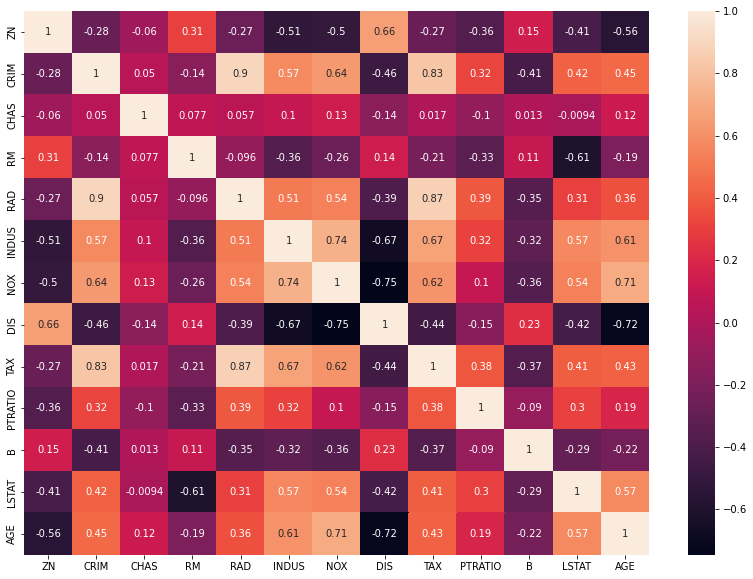

In [51]:
corr_df = not_null_df[ind_var].corr()
plt.figure(figsize = (14,10))
sns.heatmap(data = corr_df, annot = True)
plt.show()

### Doubt: Should we find multicollinearity for categorical independent variables and specially for numerical categorical ind variables.

We see there are many variables with high collinearity in both directions.



#Independent variables and dependent variable should follow Gausian distribution.

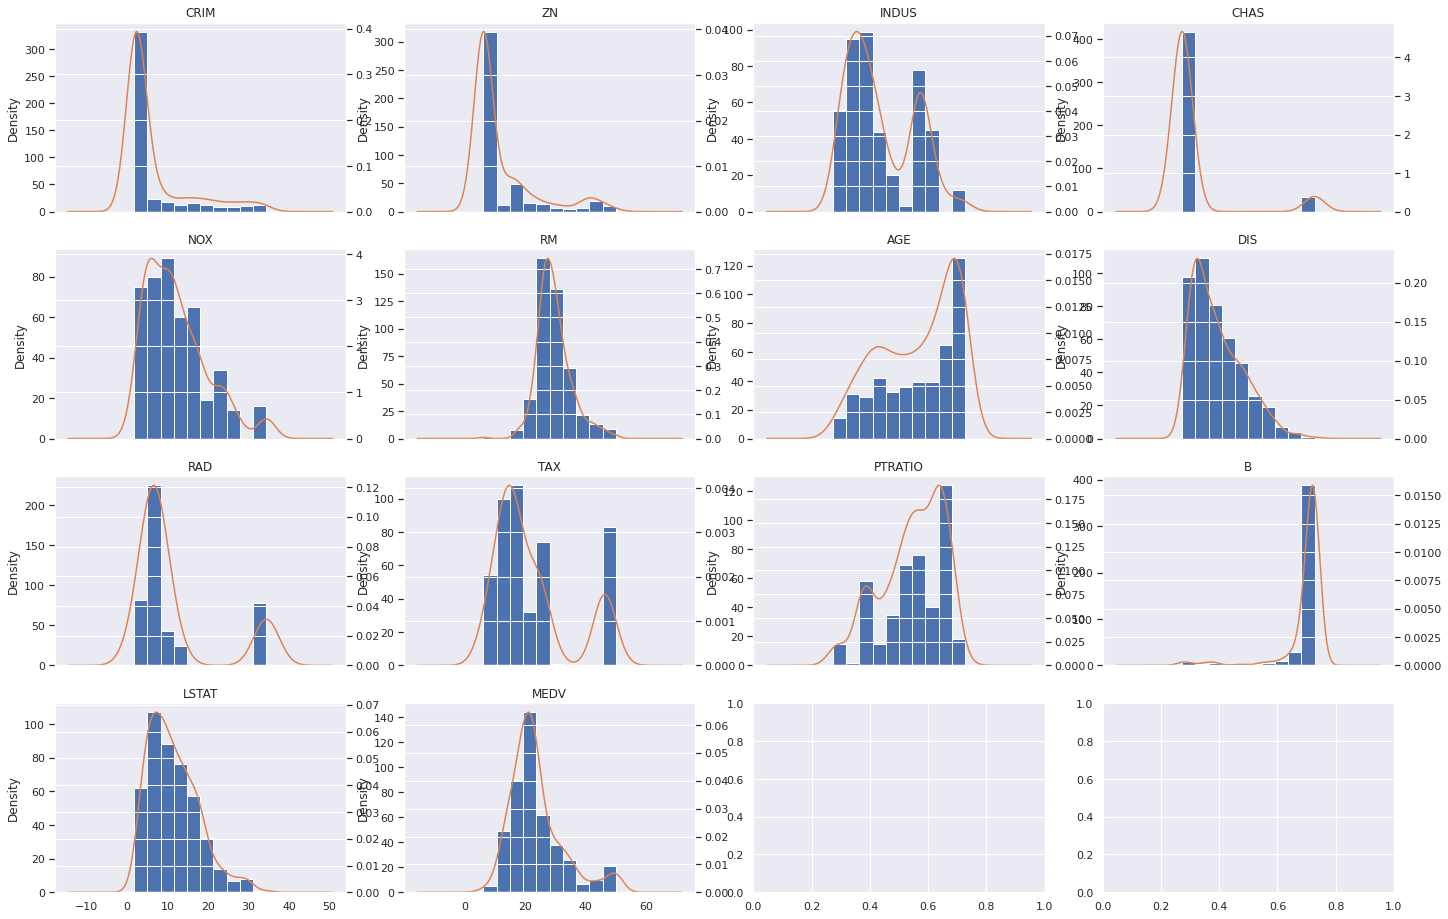

In [62]:
k = len(not_null_df.columns)
n = 4
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 6, m * 4))
for i, (name, col) in enumerate(not_null_df.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax)
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
    ax2.set_ylim(0)
